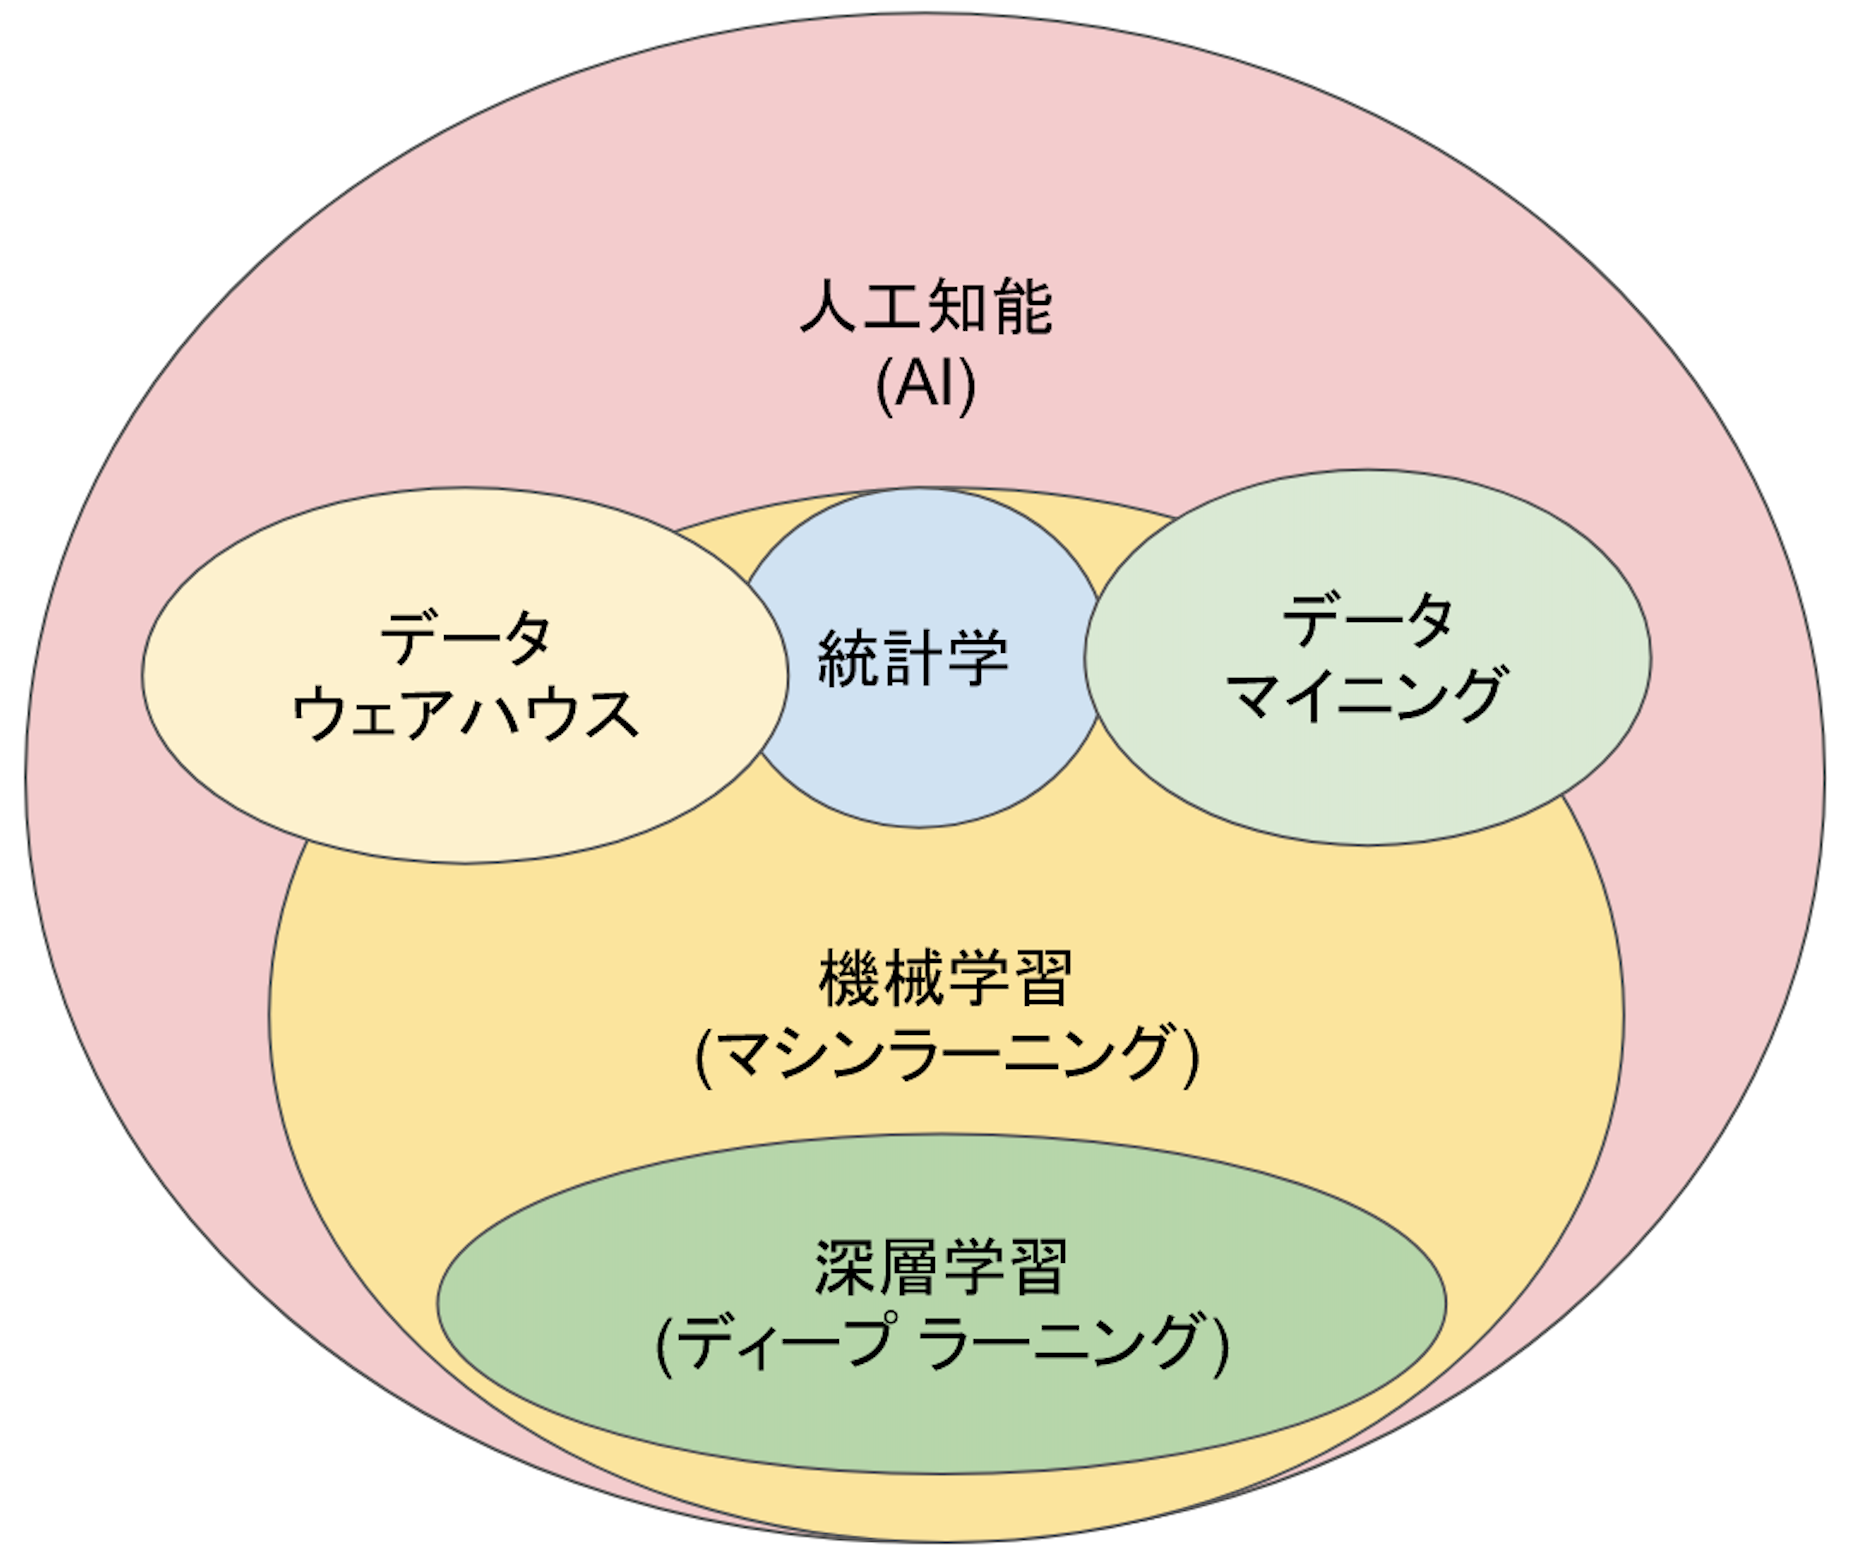

In [1]:
import datetime
import IPython.display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader
import sklearn
import sklearn.linear_model
import sklearn.linear_model
import sklearn.model_selection

IPython.display.Image('concept.png', width=500)

In [7]:
# financeをimport
import yfinance
# データを取得 
yfinance.pdr_override()
# データウェアハウス
df_aapl = pandas_datareader.data.get_data_yahoo('AAPL', '2014-01-01')
df_fb = pandas_datareader.data.get_data_yahoo('META', '2014-11-01')
df_gold = pandas_datareader.data.get_data_yahoo('GLD', '2014-11-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
df_aapl.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-23,158.830002,161.550003,157.679993,158.929993,158.929993,67622100
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500


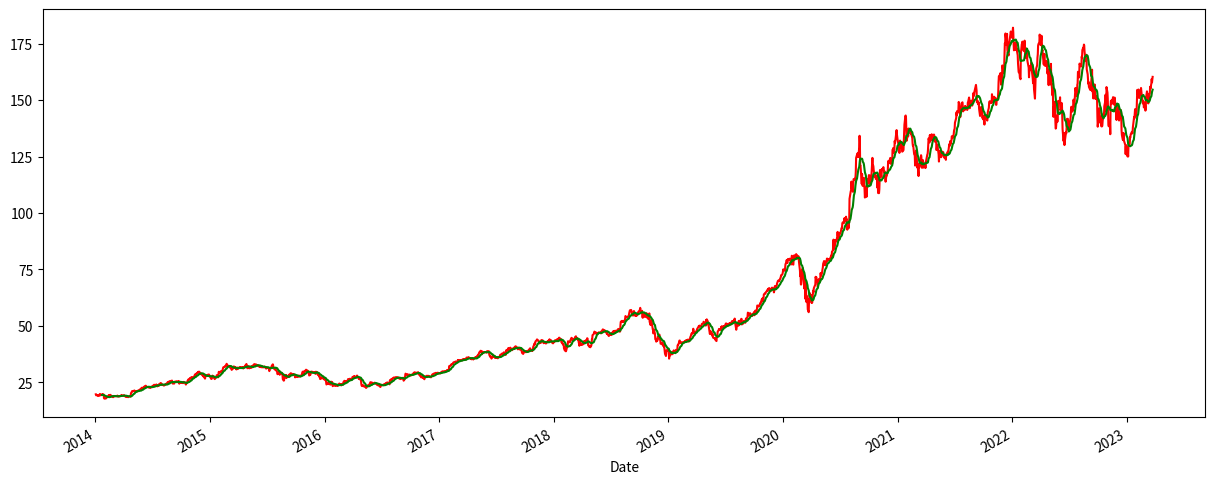

In [9]:
# 統計学 Simple Moving Average
df_aapl['SMA'] = df_aapl['Close'].rolling(window=14).mean() # 過去14日間closeの平均
df_aapl['Close'].plot(figsize=(15, 6), color="red")
df_aapl['SMA'].plot(figsize=(15, 6), color="green")
plt.show()

In [10]:
# データマイニング(予測)
df_aapl['change'] = (((df_aapl['Close'] - df_aapl['Open'])) / (df_aapl['Open']) * 100)  # マーケットが開いてからの株価の値上がり率
df_fb['change'] = (((df_fb['Close'] - df_fb['Open'])) / (df_fb['Open']) * 100)
df_gold['change'] = (((df_gold['Close'] - df_gold['Open'])) / (df_gold['Open']) * 100)
df_aapl.tail(2).round(2)


,Open,High,Low,Close,Adj Close,Volume,SMA,change
Date,,,,,,,,
2023-03-23,158.83,161.55,157.68,158.93,158.93,67622100,154.12,0.06
2023-03-24,158.86,160.34,157.85,160.25,160.25,59196500,154.58,0.87


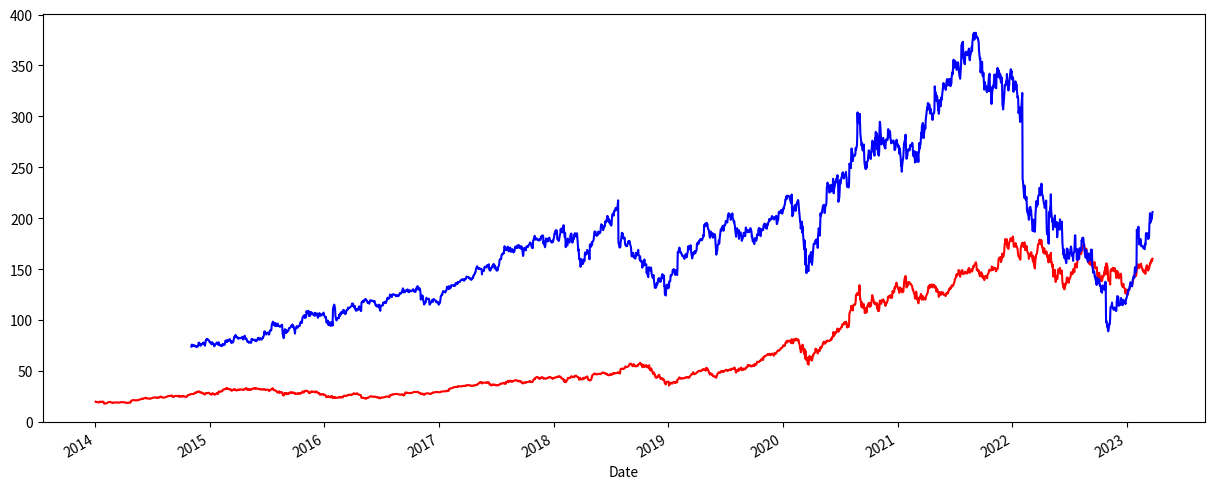

In [11]:
# データマイニング(正比例?)
df_aapl['Close'].plot(figsize=(15, 6), color="red")
df_fb['Close'].plot(figsize=(15, 6), color="blue")
plt.show()

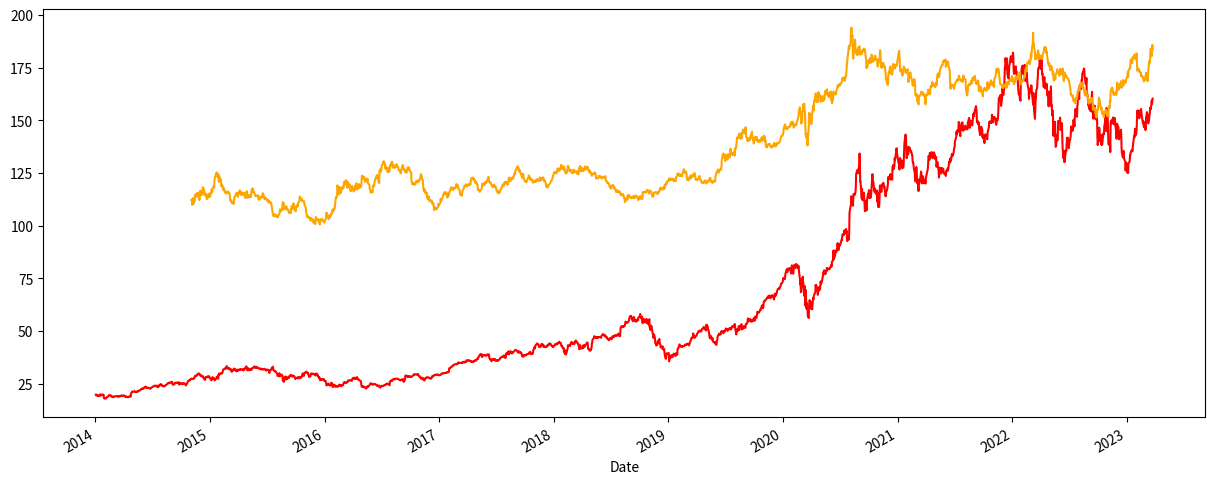

In [12]:
# データマイニング(反比例?)
df_aapl['Close'].plot(figsize=(15, 6), color="red")
df_gold['Close'].plot(figsize=(15, 6), color="orange")
plt.show()

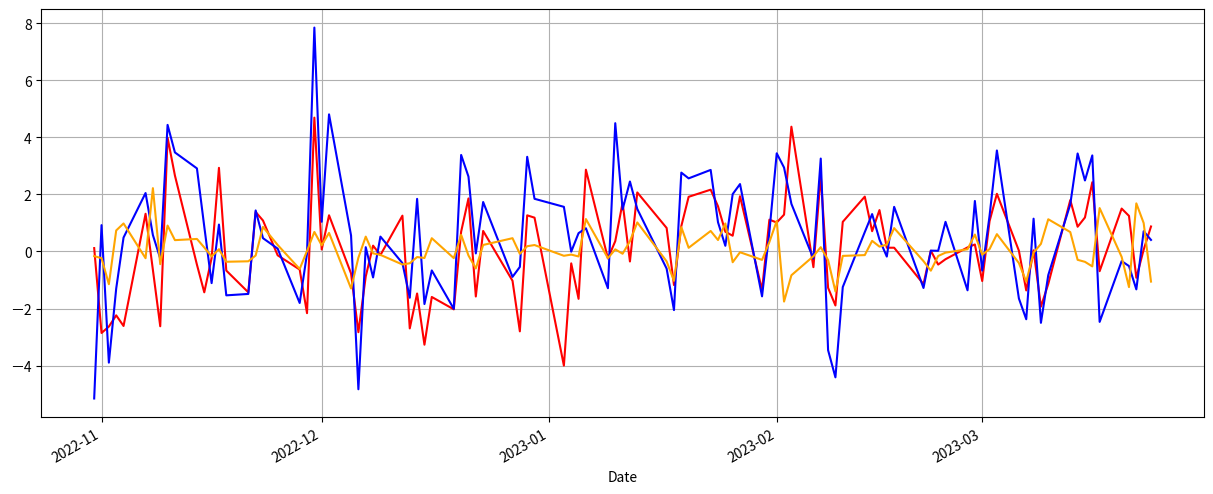

In [13]:
# データマイニング
df_aapl['change'].tail(100).plot(grid=True, figsize=(15, 6), color="red")
df_fb['change'].tail(100).plot(grid=True, figsize=(15, 6), color="blue")
df_gold['change'].tail(100).plot(grid=True, figsize=(15, 6), color="orange")
plt.show()

In [15]:
# 機械学習
df_aapl['label'] = df_aapl['Close'].shift(-30)
df_aapl.tail(40)

,Open,High,Low,Close,Adj Close,Volume,SMA,change,label
Date,,,,,,,,,
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.707520,70555800,137.301429,1.934890,150.470001
2023-01-30,144.960007,145.550003,142.850006,143.000000,142.781998,64015300,138.219286,-1.352102,152.589996
2023-01-31,142.699997,144.339996,142.279999,144.289993,144.070023,65874500,139.187857,1.114223,152.990005
2023-02-01,143.970001,146.610001,141.320007,145.429993,145.208282,77663600,140.040714,1.014094,155.850006
2023-02-02,148.899994,151.179993,148.169998,150.820007,150.590088,118339000,141.284285,1.289465,155.000000
2023-02-03,148.029999,157.380005,147.830002,154.500000,154.264465,154357300,142.694286,4.370737,157.399994
2023-02-06,152.570007,153.100006,150.779999,151.729996,151.498688,69858300,143.822142,-0.550575,159.279999
2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,145.210713,2.661972,157.830002
2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,146.399998,-1.273724,158.929993


In [17]:
# 機械学習
# ラベル業を削除したデータをxに代入
X = np.array(df_aapl.drop(['label', 'SMA'], axis=1))
# 取りうる値の大小が　著しく異なる特徴量を入れると結果が悪くなり、平均を引いて、標準偏差で割ってスケーリングする
X = sklearn.preprocessing.scale(X)

# 予測に使う過去30日間のデータ
predict_data = X[-30:]
# 過去30日間を取り除いた入力データ
X = X[:-30]
y = np.array(df_aapl['label'])
# 過去30日間を取り除いた正解ラベル
y = y[:-30]

# 訓練データ80% 検証データ20%に分ける
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

# 訓練データを用いて学習する
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)

# 検証データを用いて検証してみる
accuracy = lr.score(X_test, y_test)
accuracy

0.9726722406026576

In [18]:
# 予測する
predicted_data = lr.predict(predict_data)
predicted_data

array([157.76737502, 160.40477784, 159.18478359, 161.72028068,
       161.48361819, 158.50632997, 155.57459963, 155.0773191 ,
       154.70478535, 153.14576918, 155.3927378 , 155.04586942,
       152.17075625, 152.83667958, 156.98717215, 161.43240346,
       157.84711872, 159.33702743, 156.93488616, 154.77449748,
       157.90147083, 158.6961895 , 158.71149457, 161.8041726 ,
       161.29324072, 163.18137914, 165.08055531, 165.22011113,
       165.6672229 , 165.92947825])

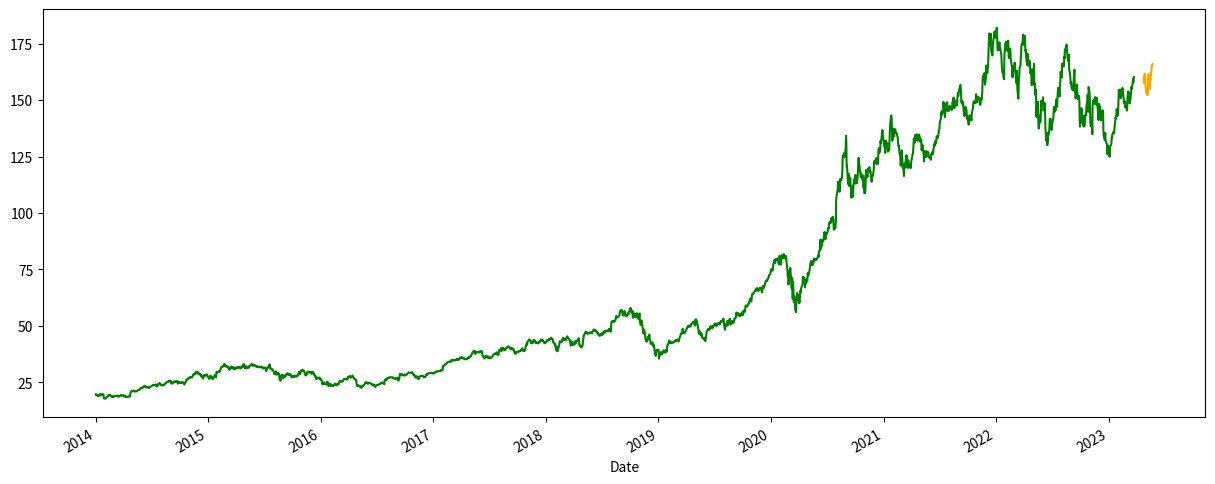

In [23]:
df_aapl['Predict'] = np.nan
last_date = df_aapl.iloc[-1].name

one_day = 86400
next_unix = last_date.timestamp() + one_day

for data in predicted_data:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_aapl.loc[next_date]  = np.append([np.nan]* (len(df_aapl.columns) -1), data)
    
df_aapl['Close'].plot(figsize=(15, 6), color="green")
df_aapl['Predict'].plot(figsize=(15, 6), color="orange")
plt.show()

In [24]:
# AI
if df_aapl['Predict'][-1] > df_aapl['Close'][-31]:
    print('Buy using ReST API')
else:
    print('Sell using REST API')

Sell using REST API
